# LSTM RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

Using TensorFlow backend.


In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2022-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0,0,0,-0.010183
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,1,1,0,-0.004321
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0,0,0,-0.002893
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,1,1,1,-0.008705
2020-01-09,48.939999,49.959999,48.389999,48.970001,48.970001,76512800,0,1,0,0.023834


In [5]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2021-12-27,147.509995,154.889999,147.250000,154.360001,154.360001,53296400,1,1,0,0.056247
2021-12-28,155.880005,156.729996,151.380005,153.149994,153.149994,58699100,0,0,0,-0.007839
2021-12-29,152.820007,154.339996,147.289993,148.259995,148.259995,51300200,0,0,0,-0.031929
2021-12-30,147.440002,148.850006,144.850006,145.149994,145.149994,44358000,1,0,0,-0.020977
2021-12-31,146.160004,148.610001,143.550003,143.899994,143.899994,49448100,0,0,0,-0.008612


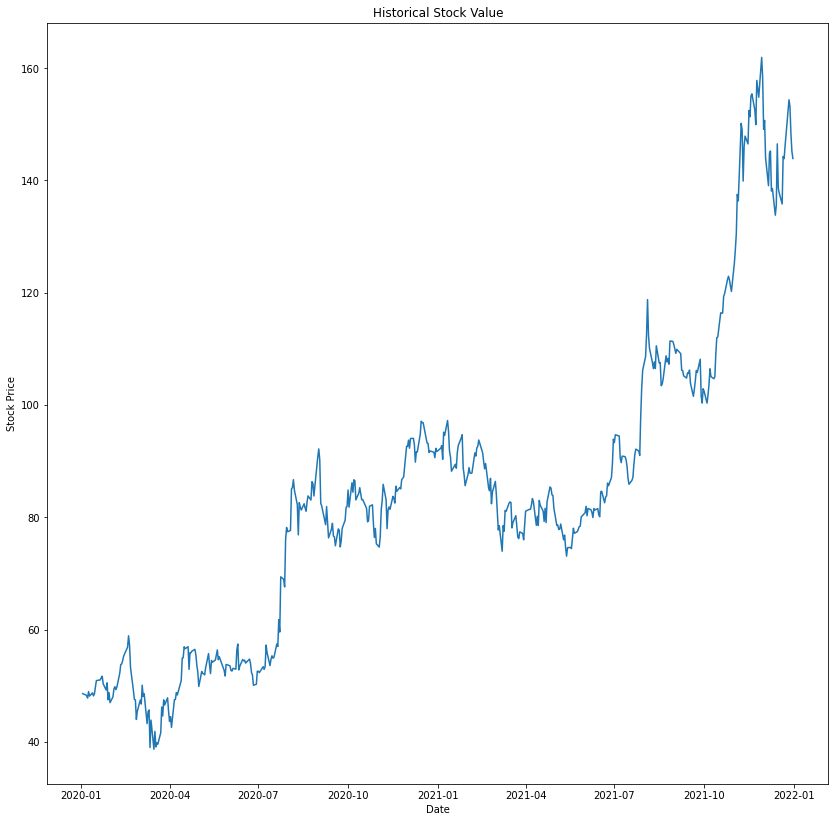

In [6]:
plt.figure(figsize=(14,14))
plt.plot(dataset['Adj Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [7]:
dataset.shape

(504, 10)

In [8]:
train_set = dataset.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(100,504):
    X_train.append(training_set_scaled[i-100:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [10]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
404/404 [==============================] - 2s 5ms/step - loss: 0.0653
Epoch 2/15
404/404 [==============================] - 1s 2ms/step - loss: 0.0154
Epoch 3/15
404/404 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 4/15
404/404 [==============================] - 1s 2ms/step - loss: 0.0081
Epoch 5/15
404/404 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 6/15
404/404 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 7/15
404/404 [==============================] - 1s 2ms/step - loss: 0.0073
Epoc

In [11]:
testdataframe= yf.download(symbol,start="2022-01-01",end="2022-07-30")
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Adj Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Adj Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((dataset['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, 150):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

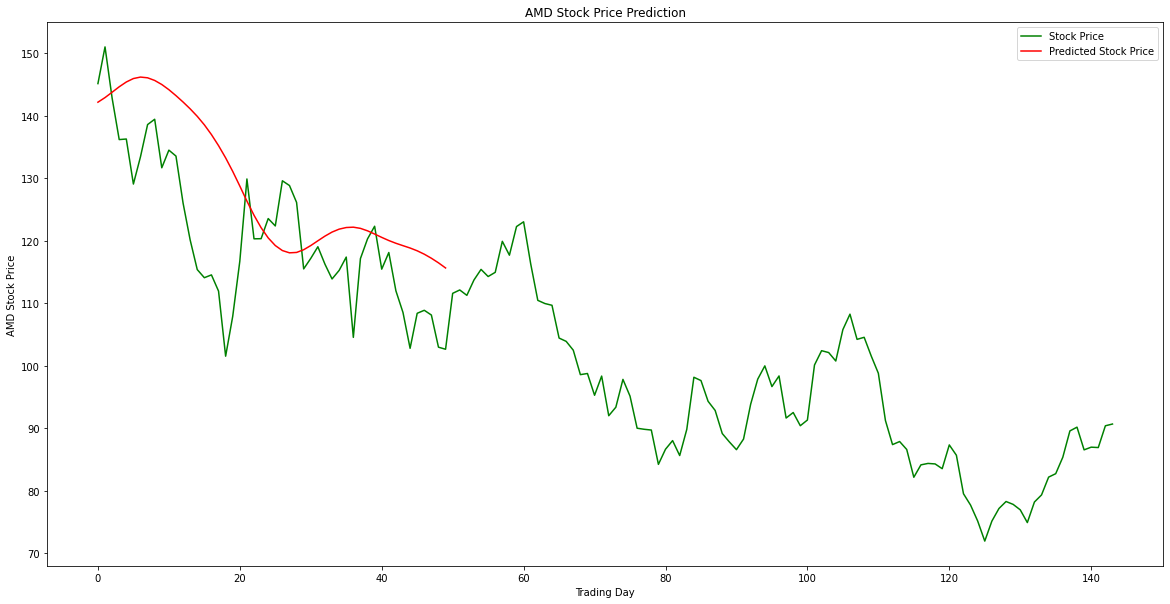

In [13]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title(symbol + ' Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel(symbol + ' Stock Price')
plt.legend()
plt.show()